平均評分: 3.50
交叉驗證平均準確率: 0.61


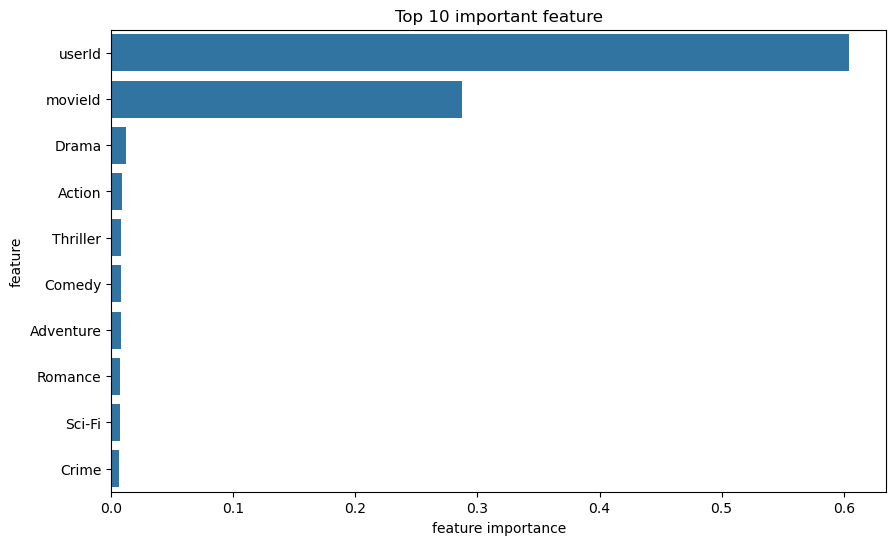

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd
import os

# 資料集路徑
data_path = r"C:\Users\User\Desktop\學\大學\大數據\ml-latest-small\ml-latest-small"

# 載入資料
ratings = pd.read_csv(os.path.join(data_path, "ratings.csv"))
movies = pd.read_csv(os.path.join(data_path, "movies.csv"))

# 合併資料集
data = pd.merge(ratings, movies, on="movieId", how="inner")

# 計算電影的平均評分
avg_rating = data['rating'].mean()
print(f"平均評分: {avg_rating:.2f}")

# 增加目標標籤，1 表示高於平均評分，0 表示低於或等於平均
data['is_high_rating'] = (data['rating'] > avg_rating).astype(int)
# 將 genres 轉換為獨熱編碼
data['genres'] = data['genres'].str.split('|')
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(data['genres']), columns=mlb.classes_)

# 合併資料
data = pd.concat([data, genres_encoded], axis=1)

# 移除無用欄位
data.drop(columns=['title', 'genres', 'timestamp'], inplace=True)

# 定義特徵和目標
X = data.drop(columns=['rating', 'is_high_rating'])
y = data['is_high_rating']

# 分割訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 模型訓練
model = RandomForestClassifier(random_state=42, n_jobs=-1)
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# 印出交叉驗證分數
print(f"交叉驗證平均準確率: {cross_val_scores.mean():.2f}")

# 訓練模型並取得特徵重要性
model.fit(X_train, y_train)
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# 繪製特徵重要性
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10])
plt.title("Top 10 important feature")
plt.xlabel("feature importance")
plt.ylabel("feature")
plt.show()


平均評分: 3.50
交叉驗證平均準確率: 0.64


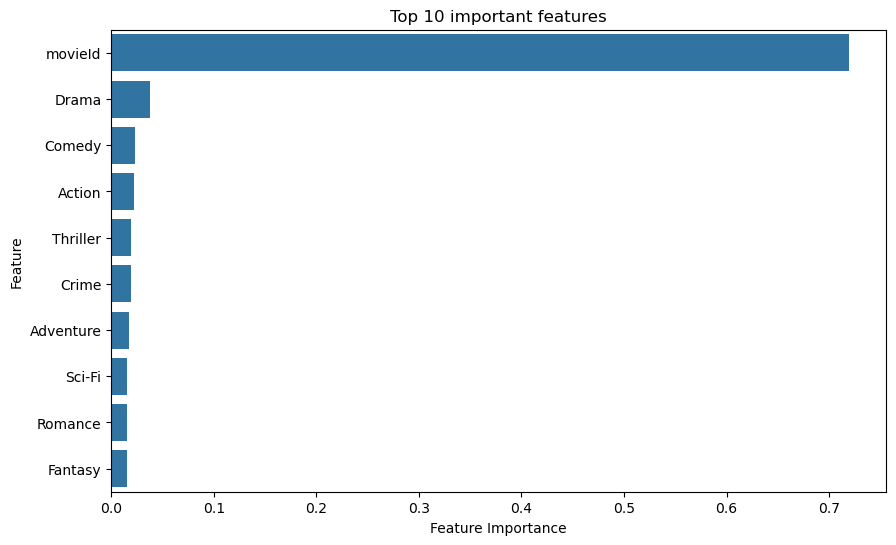

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd
import os

# 資料集路徑
data_path = r"C:\Users\User\Desktop\學\大學\大數據\ml-latest-small\ml-latest-small"

# 載入資料
ratings = pd.read_csv(os.path.join(data_path, "ratings.csv"))
movies = pd.read_csv(os.path.join(data_path, "movies.csv"))

# 合併資料集
data = pd.merge(ratings, movies, on="movieId", how="inner")

# 計算電影的平均評分
avg_rating = data['rating'].mean()
print(f"平均評分: {avg_rating:.2f}")

# 增加目標標籤，1 表示高於平均評分，0 表示低於或等於平均
data['is_high_rating'] = (data['rating'] > avg_rating).astype(int)

# 將 genres 轉換為獨營編碼
data['genres'] = data['genres'].str.split('|')
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(data['genres']), columns=mlb.classes_)

# 合併資料
data = pd.concat([data, genres_encoded], axis=1)

# 移除無用欄位
data.drop(columns=['title', 'genres', 'timestamp', 'userId'], inplace=True)

# 定義特徵和目標
X = data.drop(columns=['rating', 'is_high_rating'])
y = data['is_high_rating']

# 分割訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 模型訓練
model = RandomForestClassifier(random_state=42, n_jobs=-1)
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# 印出交叉驗證分數
print(f"交叉驗證平均準確率: {cross_val_scores.mean():.2f}")

# 訓練模型並取得特徵重要性
model.fit(X_train, y_train)
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# 繪製特徵重要性
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10])
plt.title("Top 10 important features")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()


平均評分: 3.50
交叉驗證平均準確率: 0.59


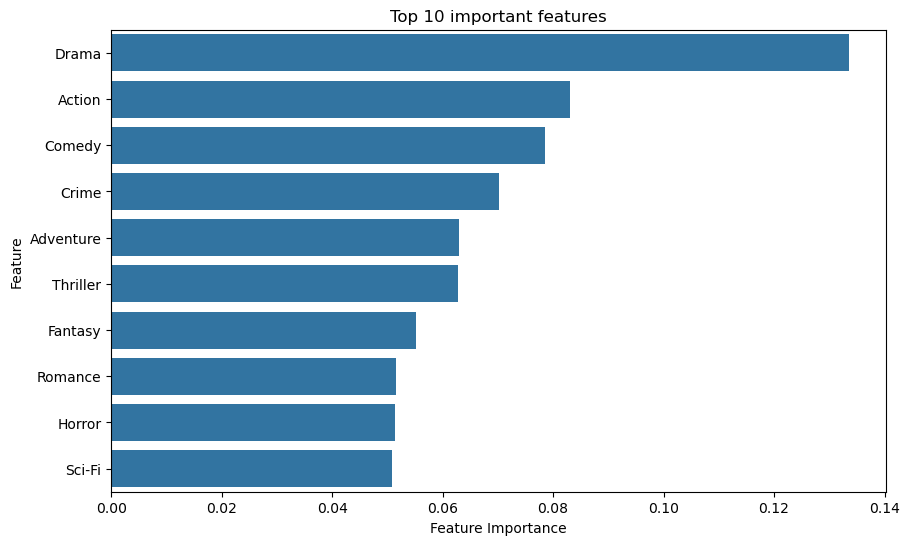

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd
import os

# 資料集路徑
data_path = r"C:\Users\User\Desktop\學\大學\大數據\ml-latest-small\ml-latest-small"

# 載入資料
ratings = pd.read_csv(os.path.join(data_path, "ratings.csv"))
movies = pd.read_csv(os.path.join(data_path, "movies.csv"))

# 合併資料集
data = pd.merge(ratings, movies, on="movieId", how="inner")

# 計算電影的平均評分
avg_rating = data['rating'].mean()
print(f"平均評分: {avg_rating:.2f}")

# 增加目標標籤，1 表示高於平均評分，0 表示低於或等於平均
data['is_high_rating'] = (data['rating'] > avg_rating).astype(int)

# 將 genres 轉換為獨營編碼
data['genres'] = data['genres'].str.split('|')
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(data['genres']), columns=mlb.classes_)

# 合併資料
data = pd.concat([data, genres_encoded], axis=1)

# 移除無用欄位
data.drop(columns=['title', 'genres', 'timestamp', 'userId',"movieId"], inplace=True)

# 定義特徵和目標
X = data.drop(columns=['rating', 'is_high_rating'])
y = data['is_high_rating']

# 分割訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 模型訓練
model = RandomForestClassifier(random_state=42, n_jobs=-1)
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# 印出交叉驗證分數
print(f"交叉驗證平均準確率: {cross_val_scores.mean():.2f}")

# 訓練模型並取得特徵重要性
model.fit(X_train, y_train)
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# 繪製特徵重要性
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10])
plt.title("Top 10 important features")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()


In [16]:
# 重新載入 movies.csv
movies = pd.read_csv(os.path.join(data_path, "movies.csv"))

# 確認 genres 是否存在
if 'genres' in movies.columns:
    # 合併原始 genres 資料
    data = pd.merge(data, movies[['movieId', 'genres']], on='movieId', how='left')
else:
    print("movies.csv 中不存在 'genres' 欄位！")


In [18]:
# 確保 genres 欄位是分隔的列表
if data['genres'].dtype == 'object':
    data['genres'] = data['genres'].str.split('|')


In [22]:
from collections import Counter

# 展平 genres 並計算每個類型的數量
all_genres = [genre for genres in data['genres'].dropna() for genre in genres]
genre_counts = Counter(all_genres)

# 建立網絡邊資料
edges = []
for genres in data['genres'].dropna():
    for i in range(len(genres)):
        for j in range(i + 1, len(genres)):
            edges.append((genres[i], genres[j]))


C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


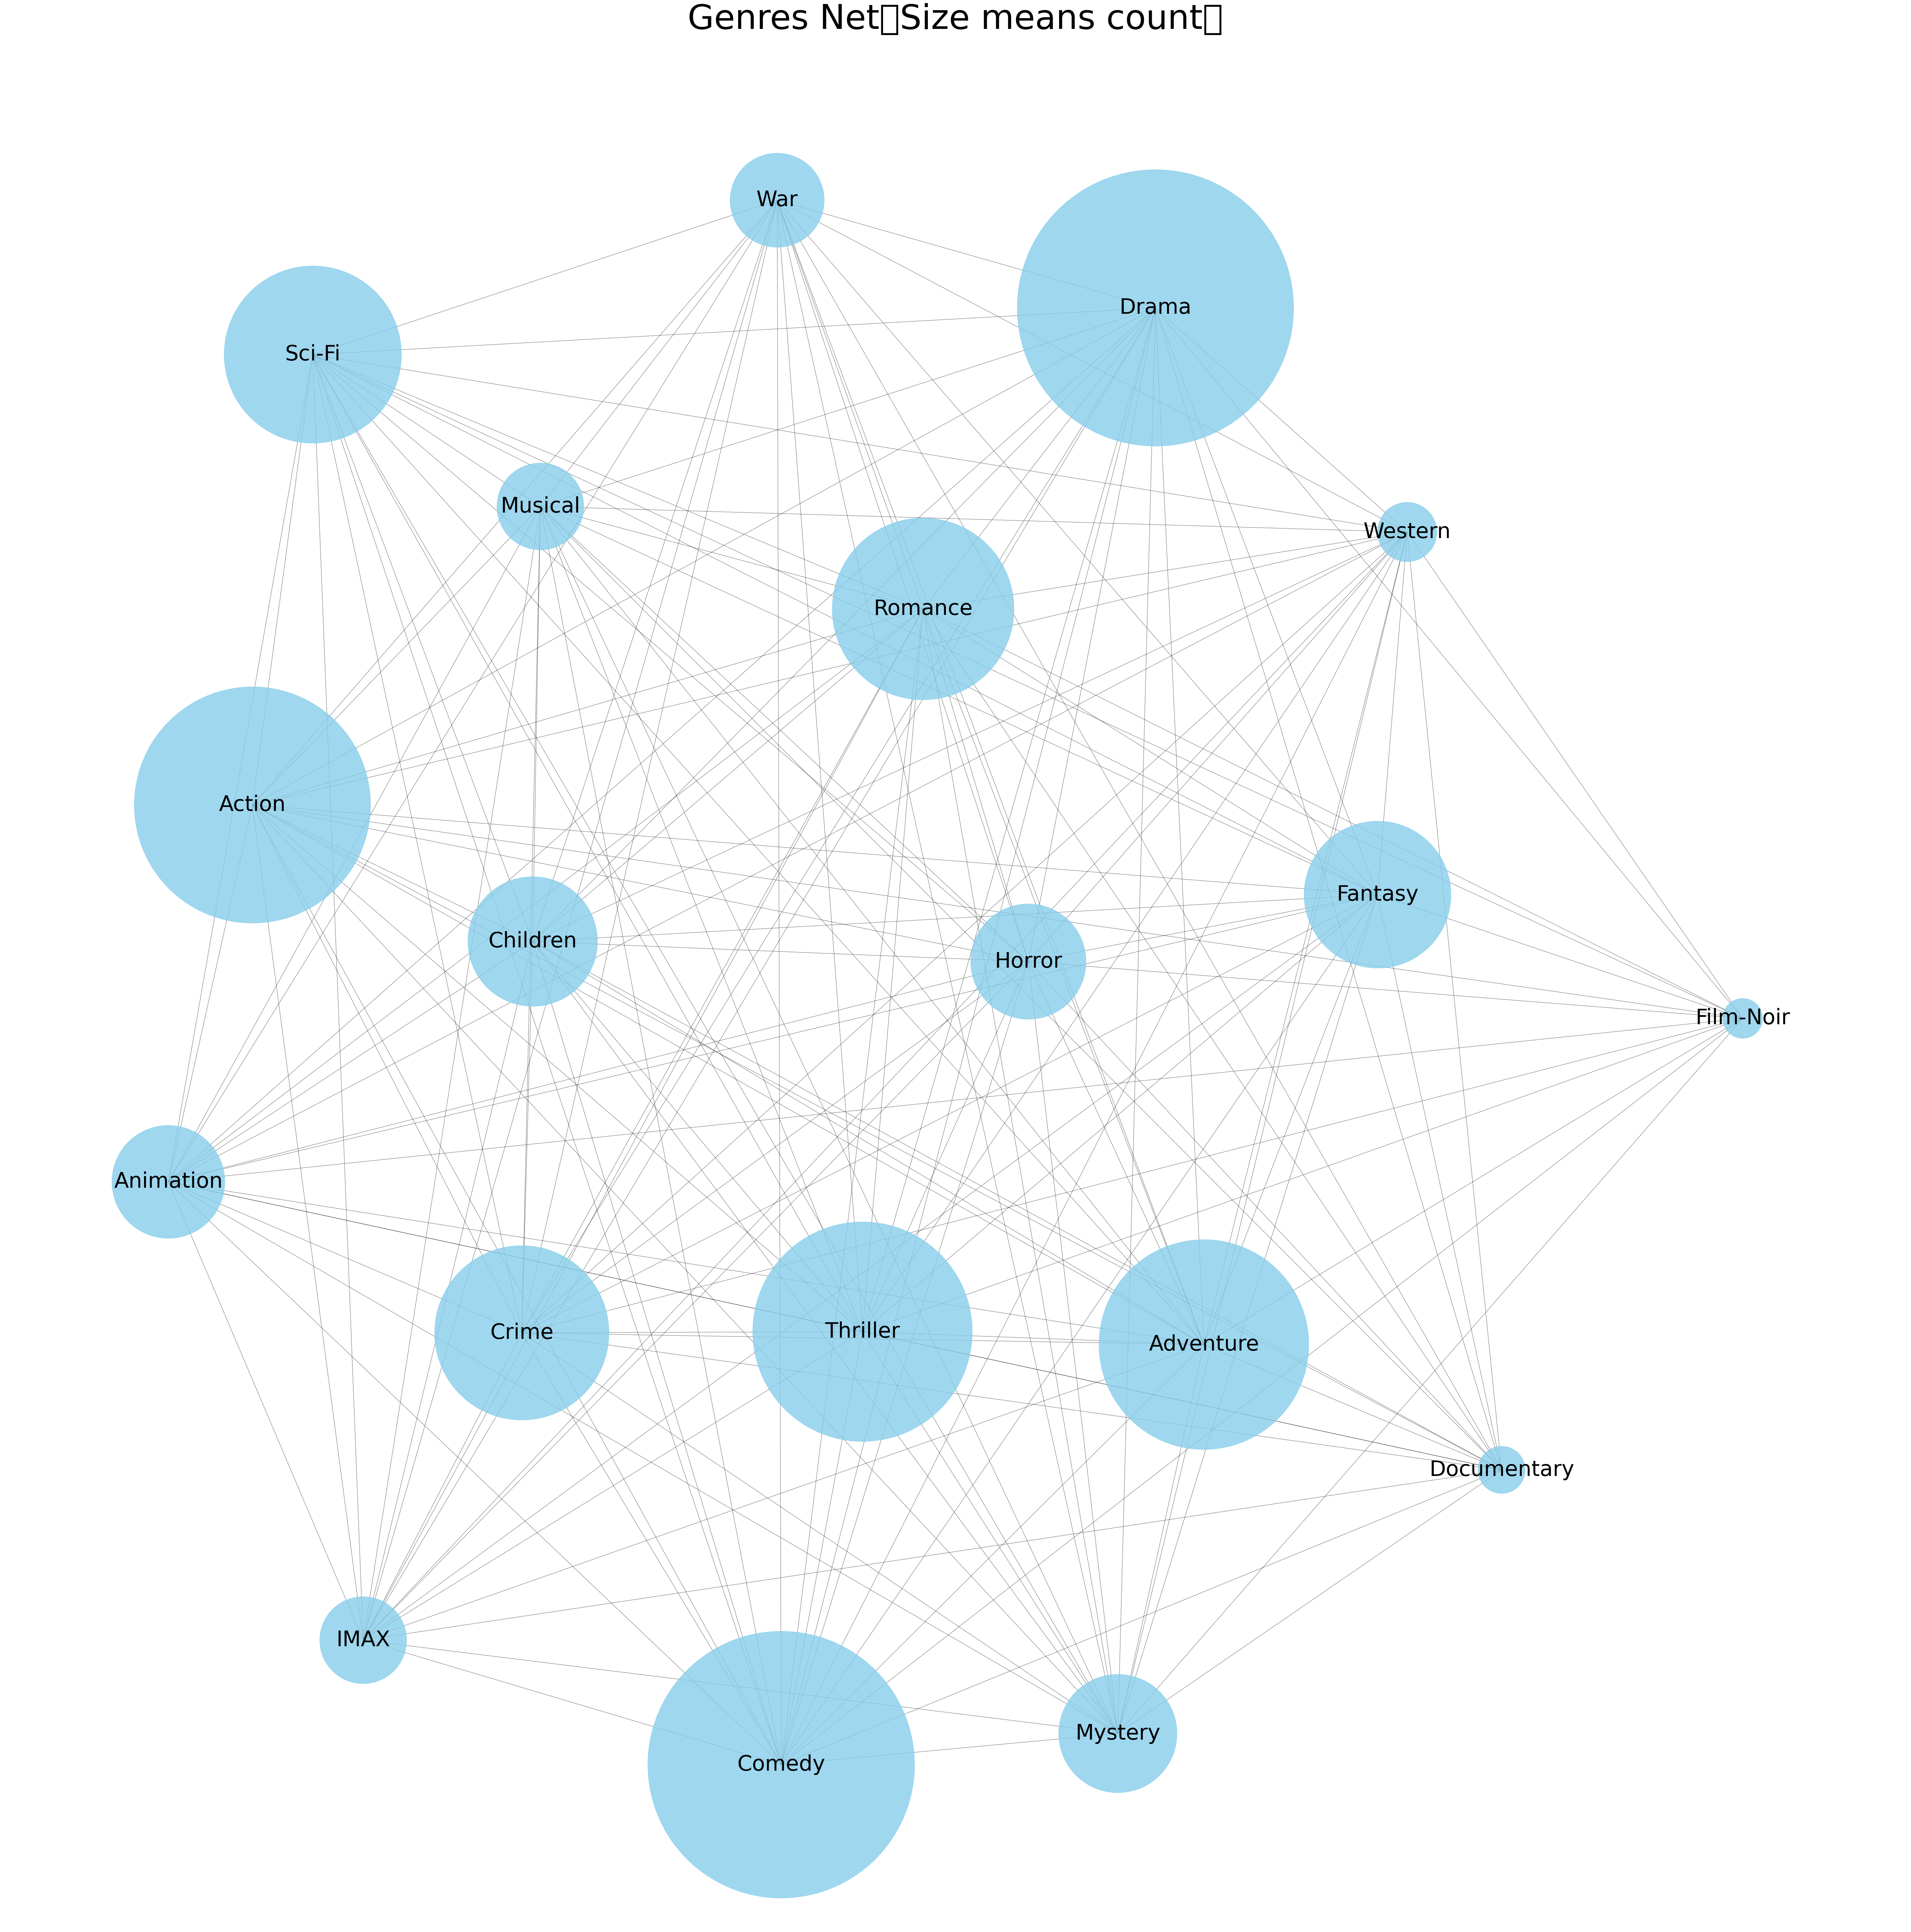

In [32]:
import networkx as nx
import matplotlib.pyplot as plt

# 建立網絡圖
G = nx.Graph()
G.add_edges_from(edges)

# 設定節點大小（根據電影數量進行調整）
node_sizes = [genre_counts[genre] * 10 for genre in G.nodes]

# 繪製網絡圖
plt.figure(figsize=(80, 80))
pos = nx.spring_layout(G, k=0.15)  # Spring 布局
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="skyblue", alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color="black", alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=50, font_color="black")

# 加標題
plt.title("Genres Net（Size means count）", fontsize=80)
plt.axis("off")
plt.show()


In [34]:
# 合併 movies 和 ratings 資料
merged_data = pd.merge(ratings, movies, on="movieId")

# 計算每部電影的平均評分和評分次數
movie_stats = merged_data.groupby('movieId').agg(
    avg_rating=('rating', 'mean'),
    num_ratings=('rating', 'count'),
    title=('title', 'first')  # 取得電影標題
).reset_index()

# 找出評分最高的電影
highest_rated_movie = movie_stats.loc[movie_stats['avg_rating'].idxmax()]

# 找出評分次數最多的電影（最受歡迎）
most_popular_movie = movie_stats.loc[movie_stats['num_ratings'].idxmax()]

# 輸出結果
print(f"評分最高的電影: {highest_rated_movie['title']} (平均評分: {highest_rated_movie['avg_rating']:.2f})")
print(f"最受歡迎的電影: {most_popular_movie['title']} (評分次數: {most_popular_movie['num_ratings']})")


評分最高的電影: Lamerica (1994) (平均評分: 5.00)
最受歡迎的電影: Forrest Gump (1994) (評分次數: 329)


In [46]:
# 資料集路徑
data_path = r"C:\Users\User\Desktop\學\大學\大數據\ml-latest-small\ml-latest-small"

# 載入資料
ratings = pd.read_csv(os.path.join(data_path, "ratings.csv"))
movies = pd.read_csv(os.path.join(data_path, "movies.csv"))


# 合併 movies 和 ratings 資料
merged_data = pd.merge(ratings, movies, on="movieId")

# 找出評分最高的電影
movie_stats = merged_data.groupby('movieId').agg(
    avg_rating=('rating', 'mean'),
    num_ratings=('rating', 'count'),
    title=('title', 'first')  # 取得電影標題
).reset_index()

# 找出評分最高的電影及其評分數量
highest_rated_movie = movie_stats.loc[movie_stats['avg_rating'].idxmax()]
print(f"評分最高的電影: {highest_rated_movie['title']} (平均評分: {highest_rated_movie['avg_rating']:.2f}, 評分數量: {highest_rated_movie['num_ratings']})")

# 展平 genres，將類型分解
movies['genres'] = movies['genres'].str.split('|')
exploded_data = pd.merge(ratings, movies, on="movieId").explode('genres')

# 計算每種類型的平均評分和評分數量
genre_stats = exploded_data.groupby('genres').agg(
    avg_rating=('rating', 'mean'),
    num_ratings=('rating', 'count')
).reset_index()

# 找出平均評分最高的類型和評分數量最多的類型
highest_rated_genre = genre_stats.loc[genre_stats['avg_rating'].idxmax()]
most_popular_genre = genre_stats.loc[genre_stats['num_ratings'].idxmax()]

# 輸出結果
print(f"平均評分最高的類型: {highest_rated_genre['genres']} (平均評分: {highest_rated_genre['avg_rating']:.2f}, 評分數量: {highest_rated_genre['num_ratings']})")
print(f"最多評分的類型: {most_popular_genre['genres']} (電影評分數量: {most_popular_genre['num_ratings']})")


評分最高的電影: Lamerica (1994) (平均評分: 5.00, 評分數量: 2)
平均評分最高的類型: Film-Noir (平均評分: 3.92, 評分數量: 870)
最多評分的類型: Drama (電影評分數量: 41928)


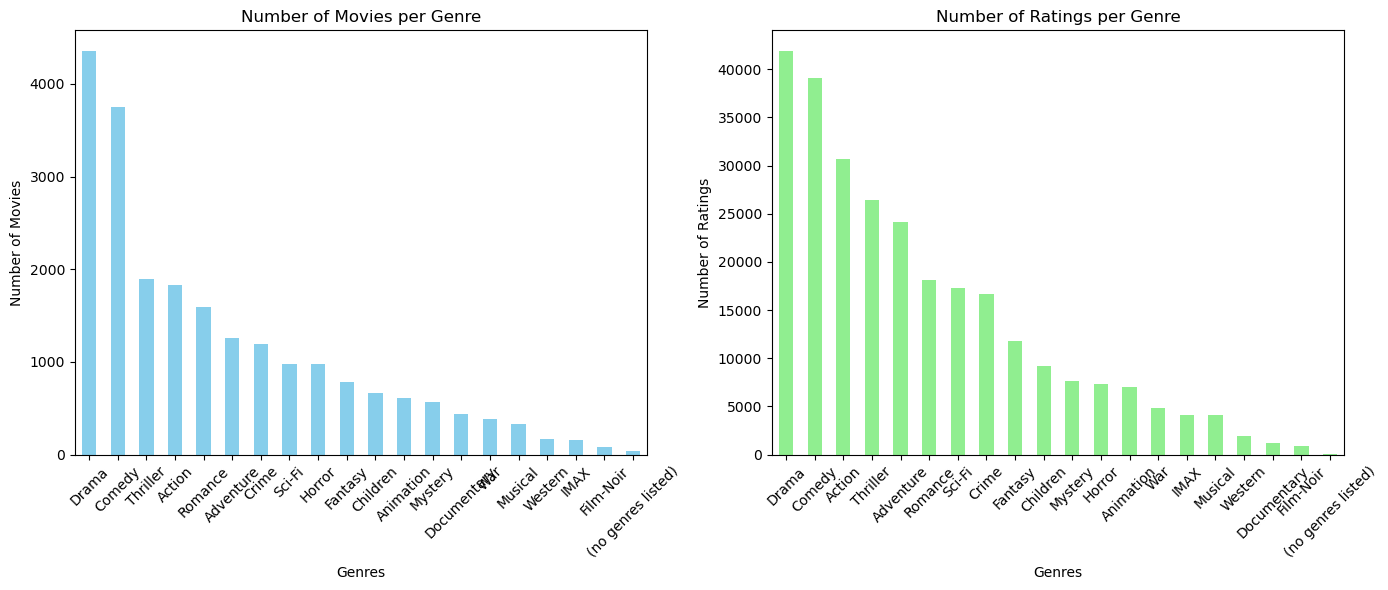

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# 資料集路徑
data_path = r"C:\Users\User\Desktop\學\大學\大數據\ml-latest-small\ml-latest-small"

# 載入資料
ratings = pd.read_csv(os.path.join(data_path, "ratings.csv"))
movies = pd.read_csv(os.path.join(data_path, "movies.csv"))

# 分離 genres 並展開
movies['genres'] = movies['genres'].str.split('|')
genres_exploded = movies.explode('genres')

# 計算每種類型的電影數量
genre_counts = genres_exploded['genres'].value_counts()

# 合併 ratings 和 genres 資料
merged_data = pd.merge(ratings, genres_exploded, on='movieId')

# 計算每種類型的評分數量
genre_rating_counts = merged_data['genres'].value_counts()

# 設定畫布大小
plt.figure(figsize=(14, 6))

# 繪製電影類型分布直方圖
plt.subplot(1, 2, 1)
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movies per Genre')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)

# 繪製電影類型評分數量直方圖
plt.subplot(1, 2, 2)
genre_rating_counts.plot(kind='bar', color='lightgreen')
plt.title('Number of Ratings per Genre')
plt.xlabel('Genres')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)

# 顯示圖表
plt.tight_layout()
plt.show()


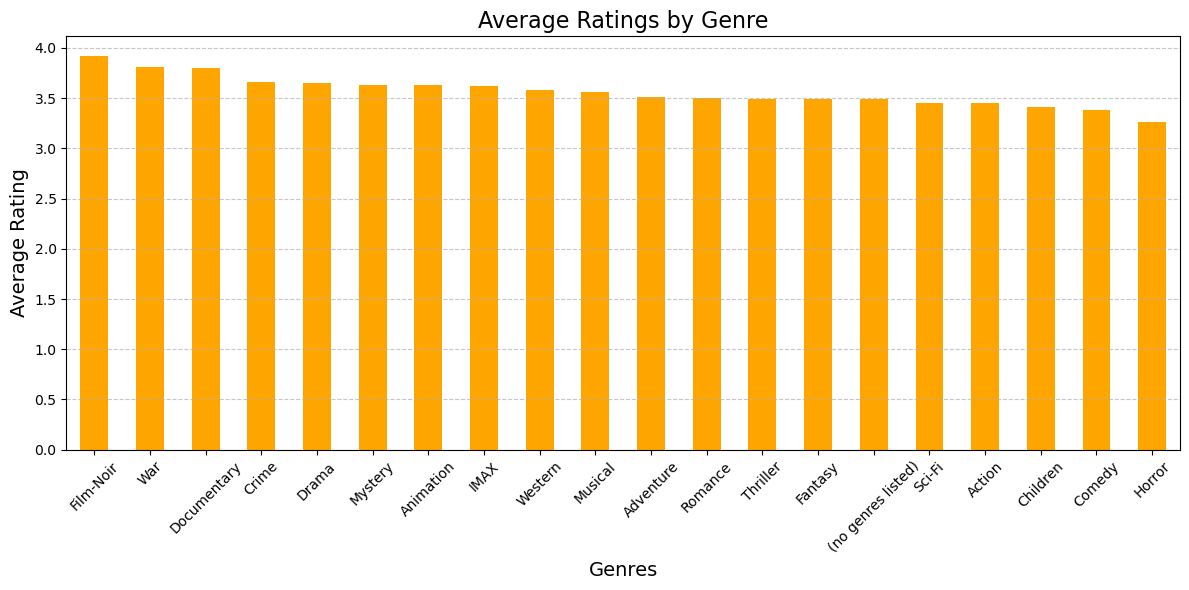

In [56]:

# 資料集路徑
data_path = r"C:\Users\User\Desktop\學\大學\大數據\ml-latest-small\ml-latest-small"

# 載入資料
ratings = pd.read_csv(os.path.join(data_path, "ratings.csv"))
movies = pd.read_csv(os.path.join(data_path, "movies.csv"))

# 分離 genres 並展開
movies['genres'] = movies['genres'].str.split('|')
genres_exploded = movies.explode('genres')

# 合併 ratings 和 genres 資料
merged_data = pd.merge(ratings, genres_exploded, on='movieId')

# 計算每種類型的平均分數
genre_avg_ratings = merged_data.groupby('genres')['rating'].mean().sort_values(ascending=False)

# 繪製直方圖
plt.figure(figsize=(12, 6))
genre_avg_ratings.plot(kind='bar', color='orange')
plt.title('Average Ratings by Genre', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 顯示圖表
plt.tight_layout()
plt.show()


In [62]:
pip install mlxtend



   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 640.0 kB/s eta 0:00:03
   - -------------------------------------- 0.1/1.4 MB 825.8 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.4 MB 1.0 MB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 1.2 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.4 MB 1.3 MB/s eta 0:00:01
   ---------- ----------------------------- 0.3/1.4 MB 1.4 MB/s eta 0:00:01
   ------------ --------------------------- 0.4/1.4 MB 1.4 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.4 MB 1.4 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.4 MB 1.4 MB/s eta 0:00:01
   ------------------ --------------------- 0.6/1.4 MB 1.5 MB/s eta 0:00:01
   -------------------- ------------------- 0.7/1.4 MB 1.5 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.4 MB 1.4 MB/s eta 0:00:01
   -----------


關聯規則:
   antecedents  consequents   support  confidence      lift
0     (Action)  (Adventure)  0.062615    0.333698  2.573940
1  (Adventure)     (Action)  0.062615    0.482977  2.573940
2     (Action)      (Drama)  0.054301    0.289387  0.646460
3      (Drama)     (Action)  0.054301    0.121302  0.646460
4     (Action)   (Thriller)  0.067235    0.358315  1.843034


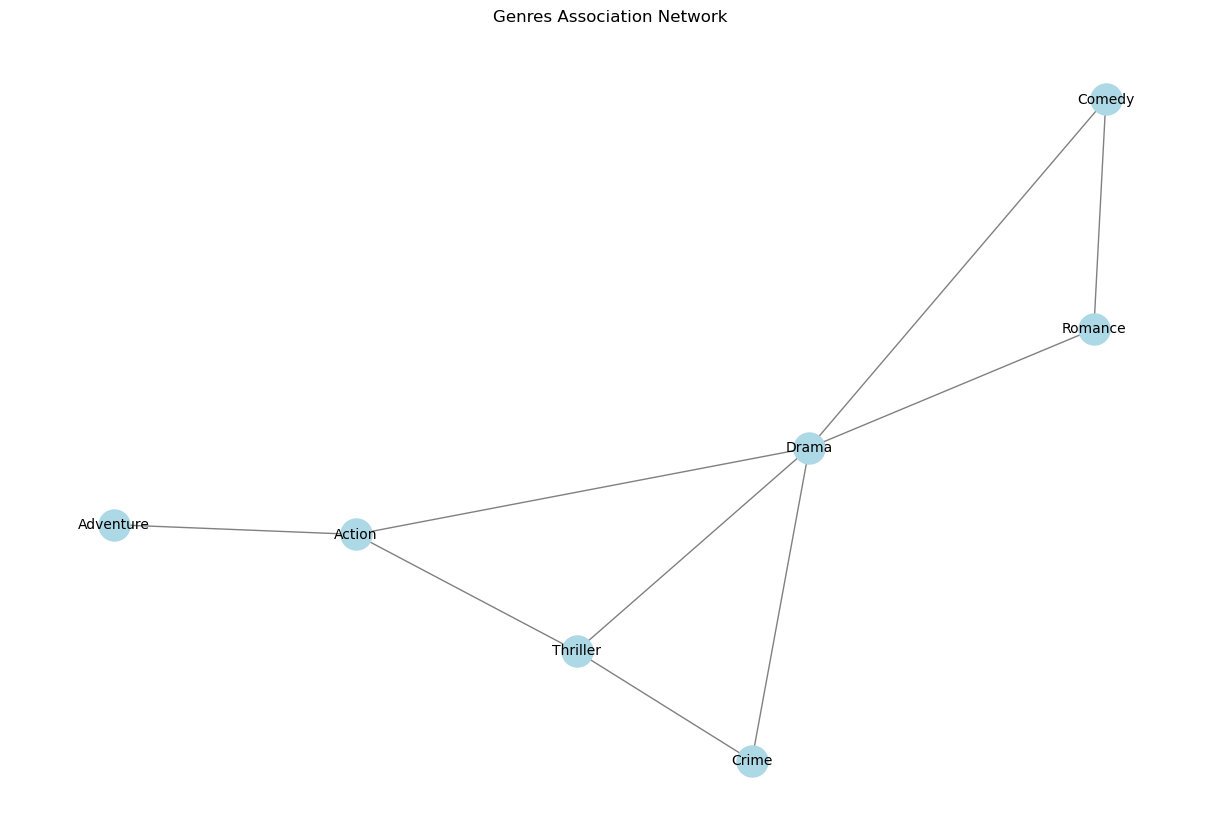

In [101]:
import os
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx
import matplotlib.pyplot as plt

# 資料集路徑
data_path = r"C:\Users\User\Desktop\學\大學\大數據\ml-latest-small\ml-latest-small"

# 1. 載入 movies 資料
movies = pd.read_csv(os.path.join(data_path, "movies.csv"))

# 2. 將 genres 字段按 '|' 分割，為每部電影生成標籤列表
movies['genres_list'] = movies['genres'].apply(lambda x: x.split('|'))

# 3. 使用 TransactionEncoder 將 genres 轉換為布爾格式
transactions = movies['genres_list'].tolist()
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
genre_matrix = pd.DataFrame(te_ary, columns=te.columns_)

# 4. Apriori 分析
# 找出頻繁項集，設置支持度門檻為 0.5
frequent_itemsets = apriori(genre_matrix, min_support=0.05, use_colnames=True)

# 5. 如果需要 num_itemsets，計算頻繁項集數量
num_itemsets = len(frequent_itemsets)

# 6. 生成關聯規則
rules = association_rules(frequent_itemsets, num_itemsets=num_itemsets, metric="lift", min_threshold=0.2)

# 檢視部分規則
print("\n關聯規則:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

# 7. 可視化關聯規則網絡圖
# 創建網絡圖
G = nx.Graph()

# 添加節點和邊
for _, row in rules.iterrows():
    G.add_edge(
        ', '.join(list(row['antecedents'])),
        ', '.join(list(row['consequents'])),
        weight=row['lift']
    )

# 繪製網絡圖
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)  # 使用彈簧佈局
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=500,
    node_color="lightblue",
    font_size=10,
    edge_color="gray",
)
plt.title("Genres Association Network")
plt.show()
